In [14]:
import pandas as pd

df = pd.read_csv('https://www.dataquest.io/wp-content/uploads/2020/11/ViewingActivity-sample.csv')

In [15]:
df.shape

(200, 10)

In [16]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [17]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type','Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis = 1)

In [18]:
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [19]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [21]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [22]:
df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head()

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,0:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,0:04:51,The Invisible War


In [23]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [26]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]
office.sample(20)
office.shape

(137, 3)

In [28]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.sample(5)
office.shape

(130, 3)

In [29]:
#How much time have I spent watching The Office
office['Duration'].sum()

Timedelta('1 days 14:57:28')

In [30]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour
office.head()

,Start Time,Duration,Title,weekday,hour
10,2013-03-18 19:04:22-04:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,19
11,2013-03-18 18:42:50-04:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,0,18
12,2013-03-18 18:21:52-04:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,0,18
14,2013-03-18 16:29:22-04:00,0 days 00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...,0,16
15,2013-03-18 16:07:57-04:00,0 days 00:21:21,The Office (U.S.): Season 5: Customer Survey (...,0,16


In [31]:
%matplotlib inline
import matplotlib

In [1]:
office['weekday'] = pd.Categorical(office['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

office_by_day = office['weekday'].value_counts()

office_by_day = office_by_day.sort_index()

matplotlib.rcParams.update({'font.size':22})

office_by_day.plot(kind='bar', figsize=(10,5), title='Office Episodes Watched by Day')

NameError: name 'pd' is not defined

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

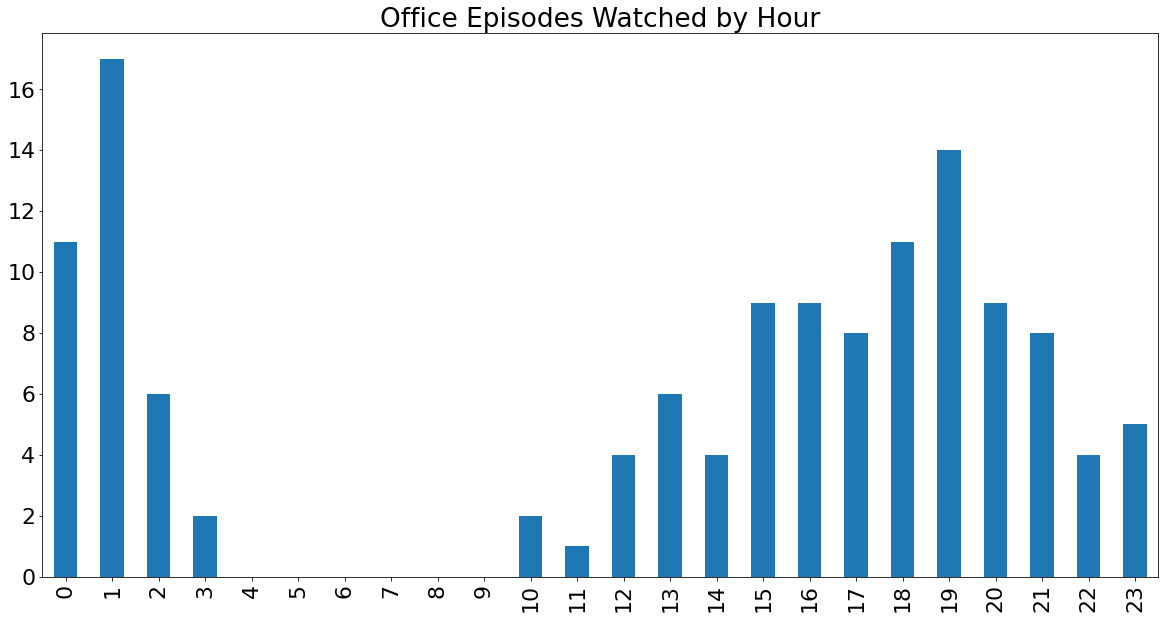

In [35]:
office['hour'] = pd.Categorical(office['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

office_by_hour = office['hour'].value_counts()

office_by_hour = office_by_hour.sort_index()

matplotlib.rcParams.update({'font.size':22})

office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')